# Fake News Detection

### Loading the necessary libraries

In [56]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
import os
import inflect #for word_to_num
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
import string

In [57]:
folder = os.listdir('./fake-news')
folder

['test.csv', 'train.csv']

In [58]:
test = pd.read_csv('./fake-news/test.csv')
train = pd.read_csv('./fake-news/train.csv')
test=test.fillna(' ')
train=train.fillna(' ')

In [59]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [60]:
sum(test['text'].isnull())

#sum(train['title'].isnull())

0

In [61]:
train['title']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
5        Jackie Mason: Hollywood Would Love Trump if He...
6        Life: Life Of Luxury: Elton John’s 6 Favorite ...
7        Benoît Hamon Wins French Socialist Party’s Pre...
8        Excerpts From a Draft Script for Donald Trump’...
9        A Back-Channel Plan for Ukraine and Russia, Co...
10       Obama’s Organizing for Action Partners with So...
11       BBC Comedy Sketch "Real Housewives of ISIS" Ca...
12       Russian Researchers Discover Secret Nazi Milit...
13       US Officials See No Link Between Trump and Russia
14       Re: Yes, There Are Paid Government Trolls On S...
15       In Major League Soccer, Argentines Find a Home...
16       Wells Fargo Chief Abruptly Steps Down - The Ne.

In [62]:
len(train['title'][0])
x = [len(train['title'][i].split()) for i in range(len(train))]
x

[14,
 9,
 7,
 10,
 14,
 20,
 17,
 13,
 19,
 16,
 12,
 9,
 13,
 9,
 14,
 15,
 11,
 14,
 5,
 11,
 23,
 10,
 8,
 13,
 17,
 11,
 15,
 12,
 16,
 11,
 12,
 9,
 13,
 17,
 16,
 13,
 13,
 6,
 10,
 17,
 10,
 10,
 14,
 13,
 12,
 15,
 12,
 8,
 14,
 17,
 4,
 7,
 15,
 0,
 14,
 10,
 15,
 8,
 16,
 12,
 14,
 12,
 16,
 8,
 17,
 12,
 13,
 12,
 11,
 13,
 7,
 6,
 13,
 15,
 14,
 15,
 21,
 9,
 14,
 11,
 15,
 13,
 4,
 8,
 9,
 17,
 1,
 15,
 16,
 11,
 17,
 16,
 13,
 21,
 7,
 10,
 8,
 13,
 13,
 15,
 12,
 12,
 15,
 11,
 8,
 12,
 17,
 12,
 12,
 12,
 19,
 13,
 18,
 17,
 15,
 14,
 14,
 14,
 13,
 16,
 0,
 13,
 14,
 14,
 0,
 15,
 11,
 15,
 12,
 14,
 13,
 9,
 16,
 16,
 11,
 13,
 13,
 13,
 8,
 14,
 0,
 15,
 18,
 14,
 14,
 10,
 17,
 11,
 8,
 9,
 15,
 14,
 13,
 12,
 16,
 14,
 4,
 18,
 13,
 6,
 20,
 12,
 11,
 7,
 10,
 18,
 14,
 11,
 10,
 10,
 8,
 12,
 8,
 12,
 22,
 6,
 19,
 12,
 18,
 8,
 14,
 15,
 14,
 15,
 10,
 10,
 9,
 12,
 10,
 17,
 16,
 9,
 16,
 10,
 5,
 14,
 0,
 19,
 11,
 14,
 20,
 11,
 10,
 15,
 5,
 18,
 11,
 7,
 13,

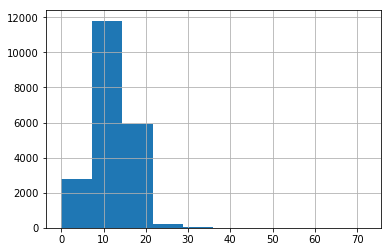

count    20800.000000
mean        12.087500
std          4.514065
min          0.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         72.000000
dtype: float64

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = x
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [64]:
train['total'] = train['title'] + ' ' + train['text']

In [65]:
a = train['total'][0]

## Cleaning the text

### 1) Encoding the text to utf-8 format 

In [66]:
def encode_utf(text):
    text = text.encode('utf-8','ignore').decode('ascii','ignore')
    return text

In [67]:
a = encode_utf(a)

### 2) Removing punctuations and tokenizing the text

In [68]:
def remove_punct(text):
    data = []
    for word in text.split():
        curr_word = ""
        for w in word:
            if w not in string.punctuation:
                curr_word += w.lower()
        data.append(curr_word)
    return data

In [69]:
a = remove_punct(a)

### 3) Removing all the digits from the text

In [70]:
def to_word(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            continue
#             new_word = p.number_to_words(word)
#             new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

In [71]:
a = to_word(a)

In [72]:
len(a)

827

### Removing stop words as they are not required for classification

In [73]:
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

In [74]:
#length reduced by almost half
len(remove_stopwords(a))

455

### Wrapper function that contains all the functions above

In [75]:
def normalize_text(paras):
    X = []
    for i in tqdm(range(len(paras))):
        text_utf = encode_utf(paras[i])
        words = remove_punct(text_utf)
        words = to_word(words)
        words = remove_stopwords(words)
        X.append(words)
    return X

In [76]:
TRAIN = train['text'].values

In [77]:
count = 0
for i in range(len(TRAIN)):
    if type(TRAIN[i]) != str:
        print(TRAIN[i])
        break
print(count)

0


In [78]:
TRAIN = normalize_text(TRAIN)

100%|██████████████████████████████████████████████████████████████████████████| 20800/20800 [2:21:41<00:00,  4.77it/s]


## Further reductions to text can be done by removing text that are below a certain word frequency

In [87]:
TRAIN = np.array(TRAIN)

In [91]:
maxLen=0
for x in TRAIN:
    maxLen = max(maxLen,len(x))

In [92]:
maxLen

12185

### Saving the train data and labels

In [93]:
np.save('train.npy',TRAIN)

In [95]:
labels = train['label'].values

In [97]:
np.save('labels.npy',labels)